In [1]:
# from starccato_flow.sky.sky import Sky
import numpy as np
from starccato_flow.nn.cvae import ConditionalVAE

In [2]:
# generate galactic supernovae from simple galactic disk model

# sky = Sky(ra=0.0, dec=0.0)
# supernovae = sky.generate_galactic_supernovae(num_supernovae=10000)

# # plot supernova in 3d plot, and 2d plot
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(12, 6))
# ax1 = fig.add_subplot(121, projection='3d')
# ax2 = fig.add_subplot(122)
# x = supernovae[:, 0]
# y = supernovae[:, 1]    
# z = supernovae[:, 2]
# ax1.scatter(x, y, z, s=0.001, alpha=0.1)
# ax1.set_xlabel('X (kpc)')
# ax1.set_ylabel('Y (kpc)')
# ax1.set_zlabel('Z (kpc)')
# ax1.set_title('3D Distribution of Galactic Supernovae')
# ax2.scatter(x, y, s=1)
# ax2.set_xlabel('X (kpc)')
# ax2.set_ylabel('Y (kpc)')
# ax2.set_title('2D Projection of Galactic Supernovae')
# plt.show()

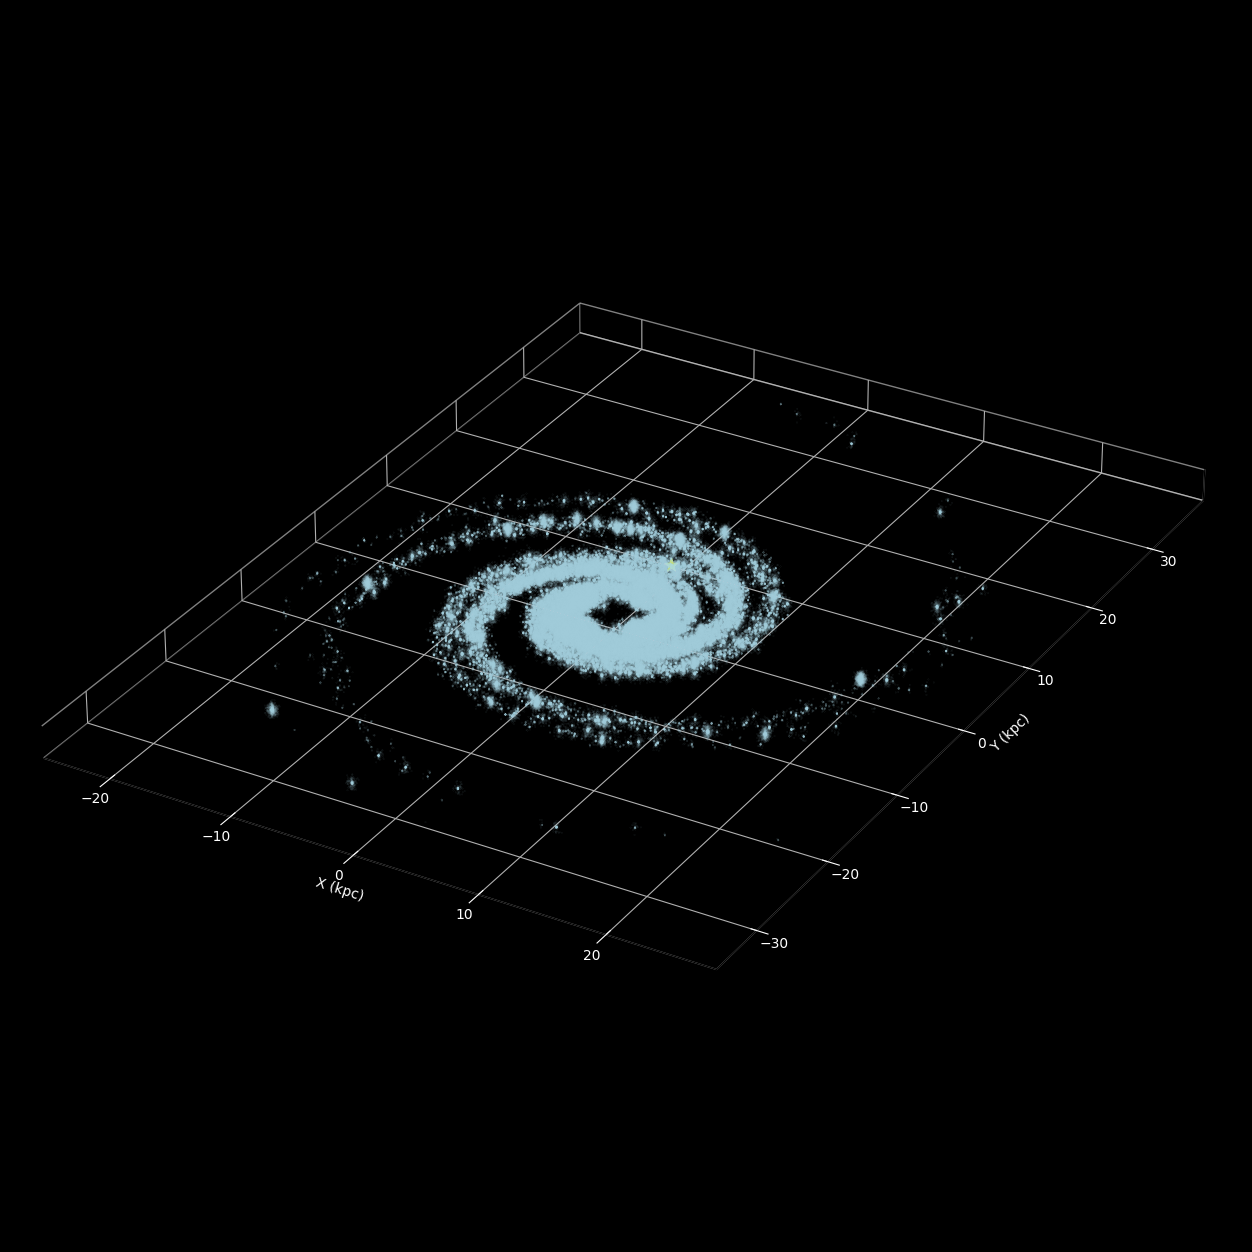

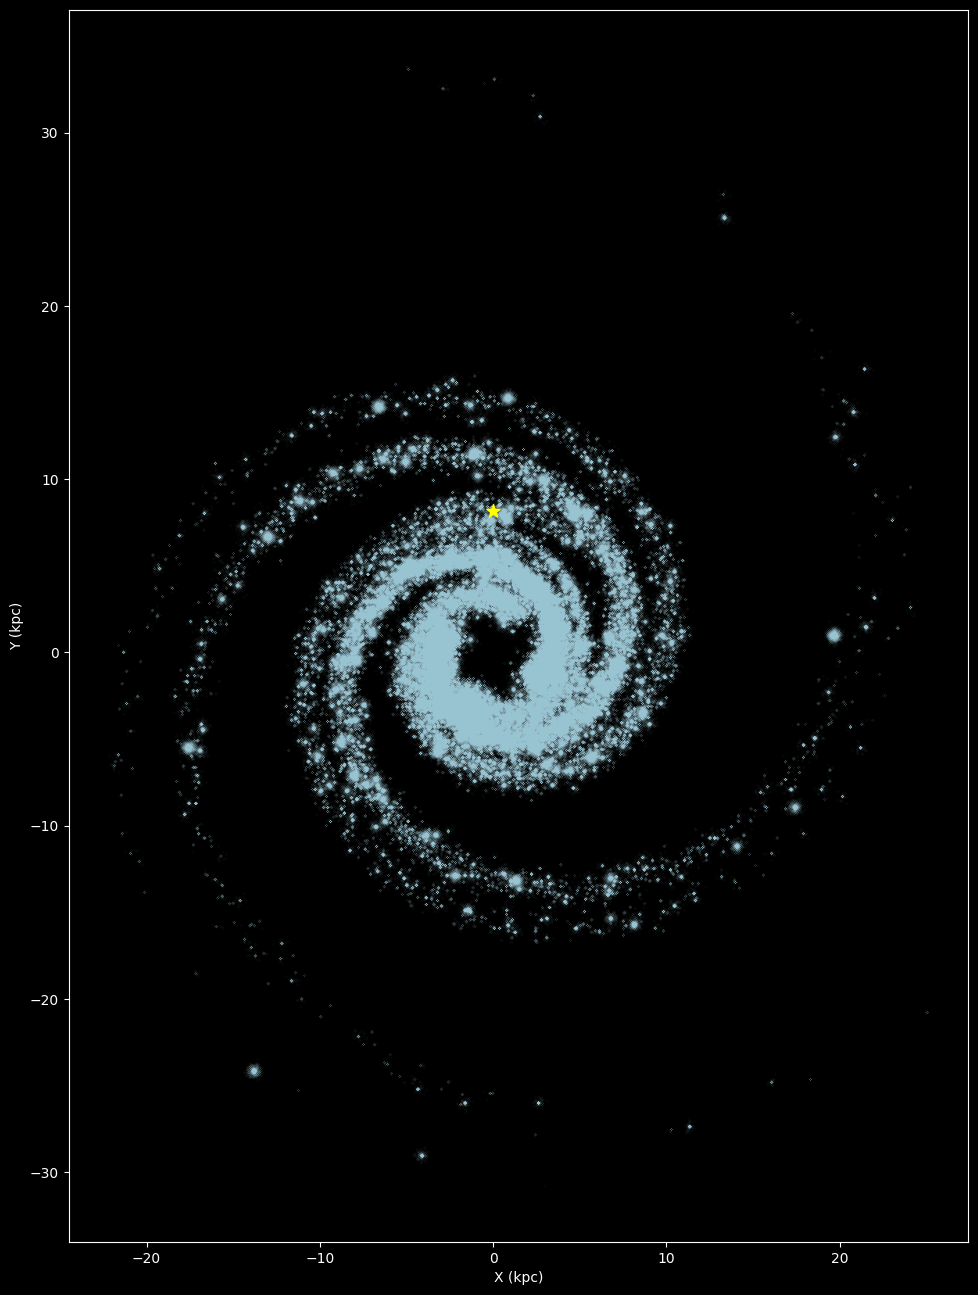

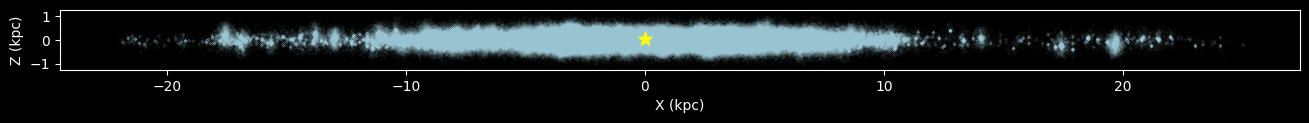

In [3]:
# read file and plot
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
data = pd.read_csv('../../exploded_supernovae_t100_sf5.csv')

x = data['x_kpc'].values
y = data['y_kpc'].values    
z = data['z_kpc'].values

sun_location = [0.0, 8.178, 0.0208]

# 3D Distribution plot
fig1 = plt.figure(figsize=(16, 16), facecolor='black')
ax1 = fig1.add_subplot(111, projection='3d', facecolor='black')
ax1.scatter(x, y, z, s=0.001, alpha=1, c='lightblue')
ax1.scatter(sun_location[0], sun_location[1], sun_location[2], s=100, c='yellow', marker='*', label='Sun')
ax1.set_xlabel('X (kpc)', color='white')
ax1.set_ylabel('Y (kpc)', color='white')
ax1.set_zlabel('Z (kpc)', color='white')
ax1.tick_params(colors='white')
ax1.set_aspect('equal')
ax1.set_zticks([])
# Remove grey panes
ax1.xaxis.pane.set_facecolor('black')
ax1.yaxis.pane.set_facecolor('black')
ax1.zaxis.pane.set_facecolor('black')
ax1.xaxis.pane.set_edgecolor('white')
ax1.yaxis.pane.set_edgecolor('white')
ax1.zaxis.pane.set_edgecolor('white')
ax1.grid(color='gray', alpha=0.2)
# Remove z-axis grid lines
ax1.zaxis._axinfo['grid']['color'] = (0, 0, 0, 0)
# Center x-y plane at z=0 (middle of galaxy)
z_max = max(abs(z.min()), abs(z.max()))
ax1.set_zlim(-z_max, z_max)
plt.show()

# X-Y Projection plot
fig2 = plt.figure(figsize=(16, 16), facecolor='black')
ax2 = fig2.add_subplot(111, facecolor='black')
ax2.scatter(x, y, s=0.001, c='lightblue', alpha=1, marker='o')
ax2.scatter(sun_location[0], sun_location[1], s=100, c='yellow', marker='*', label='Sun')
ax2.set_xlabel('X (kpc)', color='white')
ax2.set_ylabel('Y (kpc)', color='white')
ax2.tick_params(colors='white')
ax2.spines['bottom'].set_color('white')
ax2.spines['left'].set_color('white')
ax2.spines['top'].set_color('white')
ax2.spines['right'].set_color('white')
ax2.set_aspect('equal')
plt.show()

# X-Z Projection plot
fig3 = plt.figure(figsize=(16, 16), facecolor='black')
ax3 = fig3.add_subplot(111, facecolor='black')
ax3.scatter(x, z, s=0.001, c='lightblue', alpha=1)
ax3.scatter(sun_location[0], sun_location[2], s=100, c='yellow', marker='*', label='Sun')
ax3.set_xlabel('X (kpc)', color='white')
ax3.set_ylabel('Z (kpc)', color='white')
ax3.tick_params(colors='white')
ax3.spines['bottom'].set_color('white')
ax3.spines['left'].set_color('white')
ax3.spines['top'].set_color('white')
ax3.spines['right'].set_color('white')
ax3.set_aspect('equal')
plt.show()

ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of labels (9).

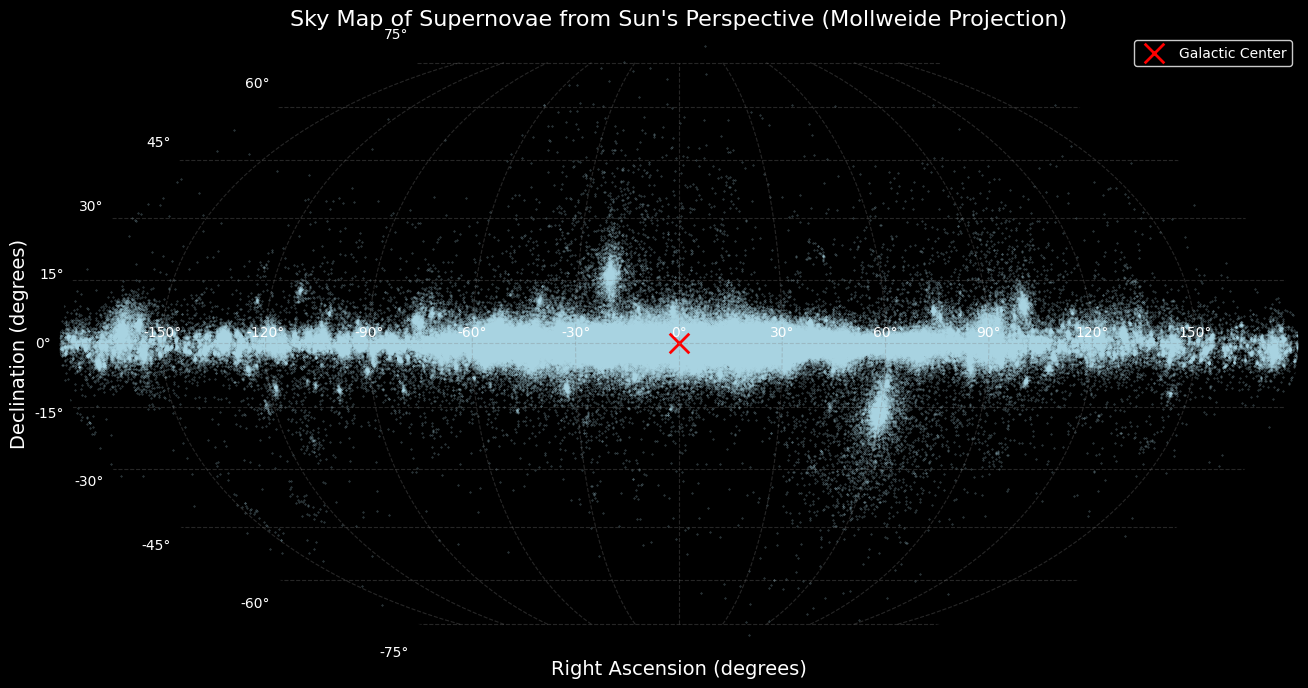

In [4]:
# Sky projection from Sun's perspective
# Calculate positions relative to the Sun
x_rel = x - sun_location[0]
y_rel = y - sun_location[1]
z_rel = z - sun_location[2]

# Convert to spherical coordinates
# The galactic center is in the -y direction from the Sun
# We want galactic center at RA=0, Dec=0
# So we rotate the coordinates so that -y axis points to RA=0, Dec=0

# Calculate distance, RA, and Dec
distance = np.sqrt(x_rel**2 + y_rel**2 + z_rel**2)

# Standard astronomical convention: 
# RA=0, Dec=0 points toward -y direction (galactic center)
# RA increases counterclockwise when viewed from north
ra = np.arctan2(x_rel, -y_rel) * 180 / np.pi  # Convert to degrees
dec = np.arcsin(z_rel / distance) * 180 / np.pi  # Convert to degrees

# Wrap RA to [0, 360) and convert to [-180, 180) for skymap
ra = ra % 360
ra_centered = np.where(ra > 180, ra - 360, ra)

# Convert to radians for projection
ra_rad = np.deg2rad(ra_centered)
dec_rad = np.deg2rad(dec)

# Create sky projection plot with Mollweide projection
fig4 = plt.figure(figsize=(16, 10), facecolor='black')
ax4 = fig4.add_subplot(111, projection='mollweide', facecolor='black')

# Plot supernovae
ax4.scatter(ra_rad, dec_rad, s=0.1, c='lightblue', alpha=0.5)

# Mark galactic center
ax4.scatter(0, 0, s=200, c='red', marker='x', linewidths=2, label='Galactic Center')

ax4.set_xlabel('Right Ascension (degrees)', color='white', fontsize=14)
ax4.set_ylabel('Declination (degrees)', color='white', fontsize=14)
ax4.set_title('Sky Map of Supernovae from Sun\'s Perspective (Mollweide Projection)', color='white', fontsize=16)
ax4.tick_params(colors='white')
ax4.grid(color='gray', alpha=0.3, linestyle='--')
ax4.legend(facecolor='black', edgecolor='white', labelcolor='white', loc='upper right')

# Set x-axis labels to degrees
ax4.set_xticklabels(['180°', '135°', '90°', '45°', '0°', '-45°', '-90°', '-135°', '-180°'], color='white')

plt.show()

print(f"Total supernovae plotted: {len(ra)}")
print(f"RA range: {ra.min():.2f}° to {ra.max():.2f}°")
print(f"Dec range: {dec.min():.2f}° to {dec.max():.2f}°")

In [ ]:
# Load trained CVAE model with weights
import torch
from starccato_flow.utils.defaults import DEVICE

# Define model architecture (must match training parameters)
z_dim = 8  # Latent dimension used during training
hidden_dim = 256  # Hidden layer dimension used during training (not 1024!)
y_length = 256  # Signal length
param_dim = 4  # Number of parameters (beta, omega, A, Ye)

# Instantiate the model
cvae = ConditionalVAE(z_dim=z_dim, hidden_dim=hidden_dim, y_length=y_length, param_dim=param_dim)

# Load trained weights
weights_path = 'outdir/cvae_weights.pt'
cvae.load_state_dict(torch.load(weights_path, map_location=DEVICE))
cvae = cvae.to(DEVICE)
cvae.eval()  # Set to evaluation mode

print(f"✓ Loaded CVAE model from {weights_path}")
print(f"  Architecture: z_dim={z_dim}, hidden_dim={hidden_dim}, param_dim={param_dim}")

In [ ]:
# Generate signals using uniform prior of parameters
num_samples = 10000

# Parameter ranges: [beta, omega, A, Ye]
min_param_values = np.array([-1, -1, -1, -1])
max_param_values = np.array([1, 1, 1, 1])

# Generate random parameters uniformly within ranges
params_unif = np.random.uniform(
    min_param_values, 
    max_param_values, 
    size=(num_samples, 4)
)

# Create DataFrame
param_df = pd.DataFrame(
    params_unif,
    columns=["beta1_IC_b", "omega_0(rad|s)", "A(km)", "Ye_c_b"]
)

print(f"Generated {num_samples} parameter sets")
print(f"\nParameter ranges:")
print(f"  beta:  [{min_param_values[0]:.3f}, {max_param_values[0]:.3f}]")
print(f"  omega: [{min_param_values[1]:.1f}, {max_param_values[1]:.1f}]")
print(f"  A:     [{min_param_values[2]:.0f}, {max_param_values[2]:.0f}] km")
print(f"  Ye:    [{min_param_values[3]:.3f}, {max_param_values[3]:.3f}]")
print(f"\nFirst few parameter sets:")
print(param_df.head())

In [ ]:
# Normalize parameters and generate signals from CVAE
from starccato_flow.data.ccsn_data import CCSNData
from starccato_flow.utils.defaults import TEN_KPC

# We need to normalize parameters to [-1, 1] for CVAE
# Use the same normalization as the training data
print("Loading training dataset for normalization...")
training_dataset = CCSNData(noise=False, curriculum=False)

# Normalize the generated parameters
# params_norm = training_dataset.normalize_parameters(params_unif)
params_norm = params_unif

print(f"\nGenerating {num_samples} signals from CVAE...")
# Convert to tensor
params_tensor = torch.tensor(params_norm, dtype=torch.float32).to(DEVICE)
z_samples = torch.randn(num_samples, z_dim).to(DEVICE)

# Generate signals
with torch.no_grad():
    generated_signals = cvae.decoder(z_samples, params_tensor).cpu().numpy()

# Denormalize signals back to physical units
signals_denorm = []
for i in range(num_samples):
    signal_denorm = training_dataset.denormalise_signals(generated_signals[i])
    signals_denorm.append(signal_denorm.flatten())

signals_array = np.array(signals_denorm).T  # Shape: (256, num_samples)

print(f"✓ Generated {num_samples} signals")
print(f"  Signal shape: {signals_array.shape}")
print(f"  Signal range: [{signals_array.min():.2e}, {signals_array.max():.2e}] (in cm)")

In [ ]:
# Plot distribution of generated signals
from starccato_flow.plotting import plot_signal_distribution

print("Plotting signal distribution...")
plot_signal_distribution(
    signals=signals_array / TEN_KPC,  # Convert to 10kpc distance
    generated=True,
    background="white",
    font_family="sans-serif",
    font_name="Avenir",
    fname="plots/cvae_generated_signal_distribution.svg"
)
print("✓ Saved plot to plots/cvae_generated_signal_distribution.svg")

In [ ]:
# Plot a grid of individual signals
from starccato_flow.plotting import plot_signal_grid

# Select 16 random signals to display in a 4x4 grid
num_display = 16
random_indices = np.random.choice(num_samples, size=num_display, replace=False)
selected_signals = signals_array[:, random_indices].T  # Transpose to (num_signals, signal_length)

print(f"Plotting grid of {num_display} random signals...")
plot_signal_grid(
    signals=selected_signals / TEN_KPC,  # Convert to 10kpc distance
    noisy_signals=None,
    num_cols=4,
    num_rows=4,
    fname="plots/cvae_generated_signal_grid.svg",
    background="white",
    generated=True,
    font_family="sans-serif",
    font_name="Avenir"
)

print("✓ Saved plot to plots/cvae_generated_signal_grid.svg")
print(f"\nDisplayed signals have parameters:")
for i, idx in enumerate(random_indices[:4]):  # Show first 4
    params = params_unif[idx]
    print(f"  Signal {i+1}: β={params[0]:.3f}, ω={params[1]:.2f}, A={params[2]:.0f}, Ye={params[3]:.3f}")